In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, filters, metrics
import cv2
from prettytable import PrettyTable

In [60]:
freq= 0.00366772681 * 100
phase=0

In [61]:
freqs = [freq]

fr_temp = freq
count = 5
while count > 0:
    fr_temp = fr_temp / 2
    freqs.append(fr_temp)
    count -= 1

print(freqs)

[0.366772681, 0.1833863405, 0.09169317025, 0.045846585125, 0.0229232925625, 0.01146164628125]


In [62]:
def function(x, frequency, ph): # функция синуса
    return(0.5*np.sin(x*frequency+ph)+0.5)

def function_dis(freq): # функция дискретизации
    out=np.array([])
    for i in np.arange(0,freq*3000,freq):
        out=np.append(out,function(i, freq, 0))
        # print(i)
    return out

def draw(frequency, phase):# вывод графика функции
    x=np.arange(0,frequency*3000,frequency)
    plt.plot(x,function(x, frequency, phase))
    # plt.xlim(0,300)
    plt.ylim(0,1)
    plt.show()

In [63]:
# Преобразование дискретных значений в изображение
def image(row):
    row = np.around(255 * row)
    image = np.full((row.size, row.size), row)
    return image

In [64]:
# Изменение размера - интерполяция методом ближайшего соседа
def interpolation(img, size):
    out = cv2.resize(img, size, cv2.INTER_NEAREST)
    return out

<Figure size 432x288 with 0 Axes>

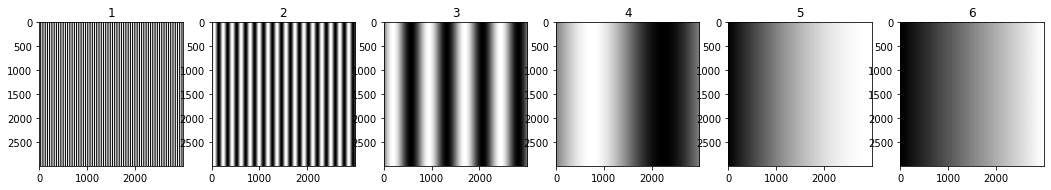

[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]


In [71]:
fig = plt.figure()

fig, axs = plt.subplots(
    nrows=1, ncols=6,
    figsize=(18, 14)
)

imgs = []

for freq_index in range(len(freqs)):
    img = image(function_dis(freqs[freq_index]))
    axs[freq_index].set_title(freq_index + 1)
    axs[freq_index].imshow(img, cmap="gray")
    imgs.append(img)

plt.show()


<Figure size 432x288 with 0 Axes>

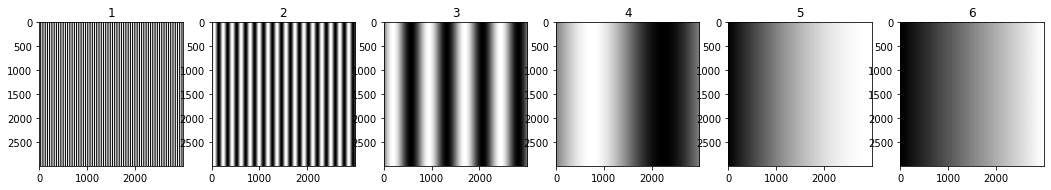

In [77]:
interpolated_imgs = []


fig = plt.figure()

fig, axs = plt.subplots(
    nrows=1, ncols=6,
    figsize=(18, 14)
)

for img_index in range(len(imgs)):
    img_interpolated = interpolation(imgs[img_index], imgs[img_index].shape)
    axs[img_index].set_title(img_index + 1)
    axs[img_index].imshow(img_interpolated, cmap="gray")
    interpolated_imgs.append(img_interpolated)

plt.show()



In [78]:
table = PrettyTable()
table.field_names = ["№", "Изображение", "MSE", "PSNR", "SSIM"]

for i in range(len(interpolated_imgs)):
    #Расчет показателей
    mse = round(metrics.mean_squared_error(imgs[0], interpolated_imgs[i]) / 255, 3)
    psnr = round(metrics.peak_signal_noise_ratio(imgs[0], interpolated_imgs[i], data_range=255), 3)
    ssim = round(metrics.structural_similarity(imgs[0], interpolated_imgs[i], multichannel=True), 3)

    temp = []   #строка таблицы
    temp.append(i+1)
    temp.append(" " + str(i+1))
    temp.extend((mse, psnr, ssim))
    table.add_row(temp)

print(table)

d:\python\tech_vision\venv\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\serku\AppData\Local\Temp\ipykernel_15752\2740060145.py:8: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = round(metrics.structural_similarity(imgs[0], interpolated_imgs[i], multichannel=True), 3)


+---+-------------+--------+-------+-------+
| № | Изображение |  MSE   |  PSNR |  SSIM |
+---+-------------+--------+-------+-------+
| 1 |       1     |  0.0   |  inf  |  1.0  |
| 2 |       2     | 63.58  | 6.032 | 0.567 |
| 3 |       3     | 63.613 |  6.03 | 0.561 |
| 4 |       4     | 63.621 | 6.029 | 0.562 |
| 5 |       5     | 63.893 | 6.011 | 0.676 |
| 6 |       6     | 35.078 | 8.615 | 0.706 |
+---+-------------+--------+-------+-------+
